<a href="https://colab.research.google.com/github/Vilash/machineLearning/blob/main/dimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import VarianceThreshold

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV

from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
sns.set()

In [ ]:
pokemon_df = pd.read_csv("https://assets.datacamp.com/production/repositories/3515/datasets/9b0682ecacc5a3429f62947794d1adbeecbd5a11/pokemon.csv", header='infer', na_values='?')

ansurMale_df = pd.read_csv("https://assets.datacamp.com/production/repositories/3515/datasets/28edd853c0a6aa7316b0d84a21f8e0d821e5010d/ANSUR_II_MALE.csv", header='infer', na_values='?')
ansurFemale_df = pd.read_csv("https://assets.datacamp.com/production/repositories/3515/datasets/802fc5cdbe3a29248483e496a966627ea9629e7a/ANSUR_II_FEMALE.csv", header='infer', na_values='?')
ansur_df = pd.concat([ansurMale_df, ansurFemale_df])


boston_df = pd.read_csv("https://assets.datacamp.com/production/repositories/3515/datasets/8d23ca278dcc6c6b59629a47e1474afd93ad960c/Public_Schools2.csv", header='infer', na_values='?')


# **EXPLORING HIGH DIMENSIONAL DATA**
---
dimensionality = # of columns in **tidy dataset**

- **`dataFrame.describe()`** - numeric

- **`dataFrame.describe(exclude = 'number')`** - non-numeric

**feature selection vs feature extraction**
- less overfitting
- deciding important features
- **`sns.pairplot`** - data visualization
- **feature selection**: reduce features with minimum information loss
- **feature extraction**: new features created by amalgamating original features

t-SNE visualization
- maximize distance in 2D space for observations that are most different in high dimensional space
- t-SNE does not work with non-numeric data
- `from sklearn.manifold import TSNE`
- `m = TSNE(learning_rate=50)`




In [ ]:
print(pokemon_df.shape)

(800, 13)


In [ ]:
pokemon_df.describe() # 9 numeric features, 4 categorical features

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [ ]:
pokemon_df.describe(exclude='number')

,Name,Type 1,Type 2,Legendary
count,800,800,414,800
unique,800,18,18,2
top,Archen,Water,Flying,False
freq,1,112,97,735


In [ ]:
print(ansur_df.info())

In [ ]:
# because t-SNE does not work with non-numeric features hence dropped
non_numeric = ['Branch', 'Gender', 'Component', 'BMI_class', 'Height_class']
ansurNum_df = ansur_df.drop(non_numeric, axis=1)

tsne_ansur = TSNE(learning_rate=100)
tsne_ansur_features = pd.DataFrame(tsne_ansur.fit_transform(ansurNum_df), columns=['x', 'y'])

In [ ]:
print(tsne_ansur_features.shape)
ansur_df['x'] = tsne_ansur_features.x
ansur_df['y'] = tsne_ansur_features.y

(6068, 2)


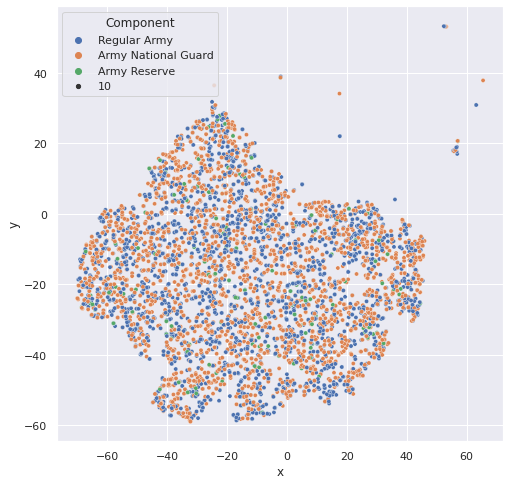

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='x', y='y', hue='Component', data=ansur_df, size=10)
plt.show()

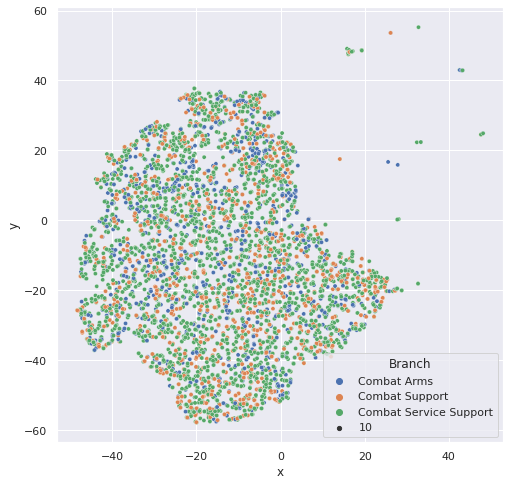

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='x', y='y', hue='Branch', data=ansur_df, size=10)
plt.show()

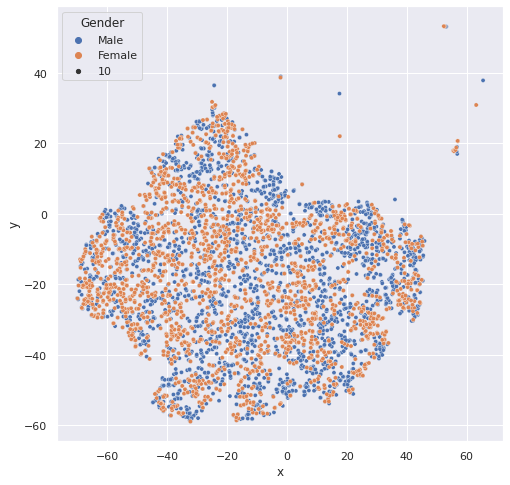

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='x', y='y', hue='Gender', data=ansur_df, size=10)
plt.show()

# **FEATURE SELECTION I, SELECTING FOR FEATURE INFORMATION**
---
**The Curse of Dimensionality**
- **number of observations** should increase **exponentially** with increase in **features**, otherwise the model is bound to overfit

**Features with missing values or little variance**
- VarianceThreshold 
  - `from sklearn.features_selection import VarianceThreshold`
  - variance threshold mask
- Missing values
  - `isna()`
  - missing value mask

**Pairwise Correlation**
- Correlation Coefficient (r[0-1]) - quantifies correlation
- `dataFrame.corr()`
- `sns.pairplot`
- `sns.heatmap`

**Removing highly correlated data**
- highly correlated features can be eliminated using threshold
- Correlation Caveat
  - anscombe's quartet, **hence visualize first**
  - causation; correlation doesn't imply causation





In [ ]:
y = ansur_df['Gender']
X = ansur_df.drop(['Branch', 'Gender', 'Component', 'BMI_class', 'Height_class'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC()

svc.fit(X_train, y_train)

accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("Train accuracy: {:.1%}\n Test accuracy: {:.1%}".format(accuracy_train, accuracy_test))

Train accuracy: 99.2%
 Test accuracy: 99.1%


In [ ]:
y = ansur_df['Gender']
# Assign just the 'neckcircumferencebase' column from ansur_df to X
X = ansur_df[['neckcircumferencebase']]

# Split the data, instantiate a classifier and fit the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC()
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

94.2% accuracy on test set vs. 92.9% on training set


**VarianceThreshold**

In [ ]:
ansur_v = ansur_df / ansur_df.mean()
feature_sel = VarianceThreshold(threshold=0.005)

feature_sel.fit(ansur_v)

mask = feature_sel.get_support()
reduced_df = ansur_v.loc[:, mask]
print(reduced_df.shape)

(6068, 47)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_variance_threshold.py:77: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


**Missing Values**


In [ ]:
mask = pokemon_df.isna().sum() / len(pokemon_df) < 0.1
print(pokemon_df.shape)
reduced_df = pokemon_df.loc[:, mask]
print(reduced_df.shape)

(800, 13)
(800, 12)


In [ ]:
mask = boston_df.isna().sum() / len(boston_df) < 0.5

reduced_df = boston_df.loc[:, mask]
print(boston_df.shape)
print(reduced_df.shape)

(131, 21)
(131, 19)


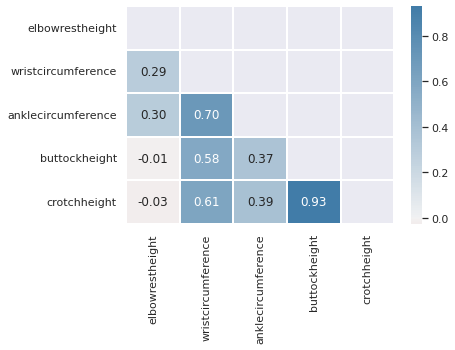

In [ ]:
ansurShort_df = ansur_df[['elbowrestheight', 'wristcircumference', 'anklecircumference', 'buttockheight', 'crotchheight']]

cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)
corr = ansurShort_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=1, annot=True, fmt='.2f')
plt.show()

In [ ]:
# get correlation matrix of features
corr_matrix = ansur_df.corr().abs()

# create mask; only lower left triangle matter
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# select correlation values based on mask
tri_df = corr_matrix.mask(mask)

# drop columns greater than threshold
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]
reduced_df = ansur_df.drop(to_drop, axis=1)

print(reduced_df.shape)

(6068, 80)


# **FEATURE SELECTION II, SELECTING MODEL FOR ACCURACY**
---
**Selecting features for model performance**
- inspect feature co-efficients
- **RFE** Recursive Feature Elimnation, 
  - **`from sklearn.feature_extraction import RFE`**
  - `support_` , `ranking_`
  - removes features with weakest(~0) coefficients

**Tree based feature selection**
- **Random Forest** feature importance values come in handy when data scaling is not an option which is required for coefficients in **Logistic Regression**

**Regularized Linear Regression**
- features selection based on alpha parameter

**Combining Feature Selector**
- `LassoCV` performs cv on multiple alpha values
 - **`LassoCV.alpha_`**





In [ ]:
# ansur_df.info()
X = ansur_df.drop(['Branch', 'Component', 'Gender', 'weight_kg', 'BMI', 'BMI_class', 'Height_class'], axis=1)
y = ansur_df['BMI']

# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Scale train data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

la = Lasso(alpha=0.1, random_state=0)
la.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)

r_squared = la.score(X_test_scaled, y_test)
print("Test Variance predicted {:.1%}".format(r_squared))
zero_coef = la.coef_ == 0

n_ignored = sum(zero_coef)
print("The model ignored {} of {} coefficients".format(n_ignored, len(X.columns)))



Test Variance predicted 98.1%
The model ignored 70 of 92 coefficients


In [ ]:
lcv = LassoCV()
lcv.fit(X_train_scaled, y_train)
print('Optimal alpha: {:.4f}'.format(lcv.alpha_))

r_squared = lcv.score(X_test_scaled, y_test)
print("R^2: {:.4f}".format(r_squared))

lcv_mask = lcv.coef_ != 0
print("The model ignored {} of {} coefficients".format(sum(lcv_mask), len(lcv.coef_)))



Optimal alpha: 0.0035
R^2: 0.9891
The model ignored 62 of 92 coefficients


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.186699180773985, tolerance: 6.7356002106448285
  positive)


In [ ]:
results = pd.DataFrame(index=['GradientBoostingRegressor', 'RandomForestRegressor'], columns=['R^2'])

rfe_gb = RFE(estimator=GradientBoostingRegressor(), n_features_to_select=10, step=3)
rfe_gb.fit(X_train_scaled, y_train)

rfe_rf = RFE(estimator=RandomForestRegressor(), n_features_to_select=10, step=3, verbose=1)
rfe_rf.fit(X_train_scaled, y_train)




In [ ]:
results.loc['GradientBoostingRegressor']['R^2'] = rfe_gb.score(X_test_scaled, y_test)
results.loc['RandomForestRegressor']['R^2'] = rfe_rf.score(X_test_scaled, y_test)

gb_mask = rfe_gb.support_
rf_mask = rfe_rf.support_
lcv_mask

votes = np.sum([gb_mask, rf_mask, lcv_mask], axis=0)

meta_mask = votes == 3

print(X_test.columns[meta_mask])

print(results)
# ['axillaheight', 'bicepscircumferenceflexed', 'buttockdepth',
#        'calfcircumference', 'chestcircumference', 'thighcircumference',
#        'waistcircumference', 'stature_m']

IndexError: ignored

In [ ]:
X_shortend = X.loc[:, meta_mask]

X_train, X_test, y_train, y_test = train_test_split(X_shortend, y, test_size=0.3, random_state=0)

lr = LinearRegression()

lr.fit(scaler.fit_transform(X_train), y_train)

results.loc['LinearRegression']['R^2'] = lr.score(scaler.transform(X_test), y_test)

print(results)

# **FEATURE EXTRACTION**
---
- multiple features combined in one feature
  - **e.g.** BMI = weight/height^2
  - **e.g.** average of left & right leg length
- information is lost
- **PCA**:
 - any point can be mapped using principal components
 - pca helps us determine how much explained variance one is willing to sacrifice

An Optimal number of components
- elbow plot for **`explained_variance_ratio_`**



In [ ]:
ansur_subset_df = ansur_df[['buttockheight', 'waistcircumference', 'shouldercircumference']]
print(ansur_subset_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6068 entries, 0 to 1985
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   buttockheight          6068 non-null   int64
 1   waistcircumference     6068 non-null   int64
 2   shouldercircumference  6068 non-null   int64
dtypes: int64(3)
memory usage: 349.6 KB
None


In [ ]:
# ansur_subset_df.index.duplicated()
ansur_ndup_df = ansur_subset_df.loc[~ansur_subset_df.index.duplicated(), :]

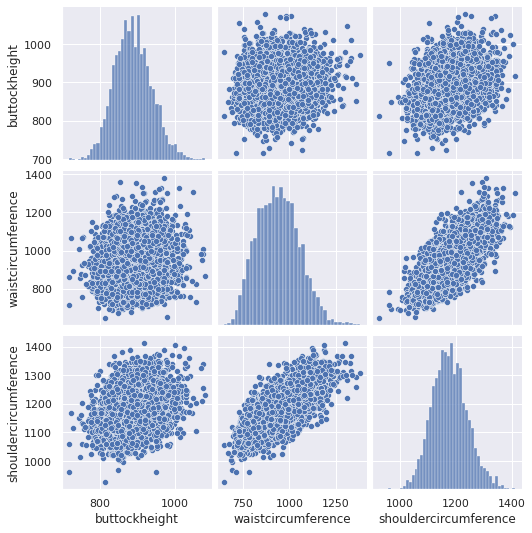

In [ ]:
sns.pairplot(ansur_ndup_df)
plt.show()

Principal Components Variance Ratio
 [0.78316389 0.14429603 0.07254008]


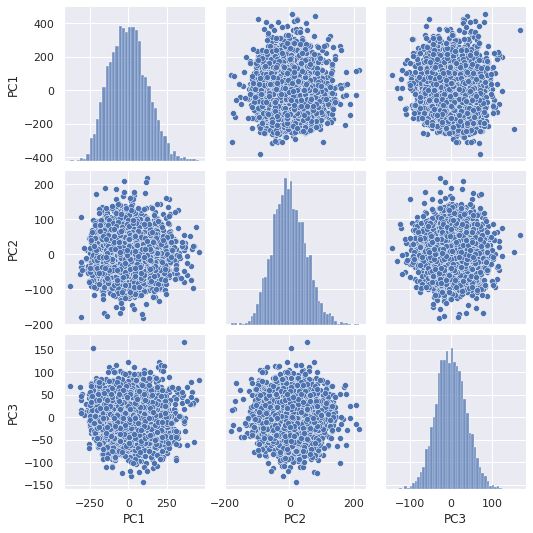

In [ ]:

scaler = StandardScaler()
scaler.fit_transform(ansur_ndup_df)

pca = PCA()
pc = pca.fit_transform(ansur_ndup_df)
print("Principal Components Variance Ratio\n",pca.explained_variance_ratio_)

pc_df = pd.DataFrame(pc, columns=['PC1', 'PC2', 'PC3'])

sns.pairplot(pc_df)
plt.show()

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(ansurNum_df)

pca = PCA()
pc = pca.fit_transform(ansurNum_df)
print("Principal Components Variance Ratio\n",pca.explained_variance_ratio_.cumsum())

# pc_df = pd.DataFrame(pc, columns=['PC1', 'PC2', 'PC3'])

# sns.pairplot(pc_df)
# plt.show()

Principal Components Variance Ratio
 [0.6504158  0.82219846 0.86367701 0.89199921 0.90833937 0.92070757
 0.92783244 0.93402929 0.93946436 0.94432041 0.94860625 0.95235823
 0.95549293 0.95852394 0.96141703 0.96374996 0.96598978 0.96799066
 0.96994073 0.97168856 0.97338816 0.97492875 0.97640894 0.9777803
 0.97904058 0.98026385 0.9814081  0.98243592 0.98345258 0.98437266
 0.98521563 0.98604064 0.98680145 0.9875371  0.98821969 0.98885475
 0.98946061 0.99004523 0.99060705 0.99112529 0.99160743 0.9920729
 0.99248621 0.99289495 0.99327318 0.99363004 0.99396365 0.99428358
 0.99458491 0.9948706  0.99513518 0.99538347 0.99562389 0.99586034
 0.99608927 0.99630359 0.99651634 0.99671531 0.99691115 0.99710503
 0.99728892 0.9974719  0.99764268 0.99781154 0.997977   0.9981318
 0.99827926 0.99842044 0.99855524 0.99868693 0.99880513 0.99891389
 0.99901591 0.99911448 0.99920579 0.99928952 0.99937091 0.99944826
 0.99950946 0.9995691  0.99962643 0.99967961 0.99972743 0.99977078
 0.99981316 0.99985024 0.999

In [ ]:
poke_df = pokemon_df.drop('Generation', axis=1)
print(type(poke_df))

<class 'pandas.core.frame.DataFrame'>
